# Boosting Sales Through Supplier and Customer Relations: A Sales Analysis

#### Company A, a local food supplier, has been providing the community with affordable food and products since 1996. As one of the key wholesalers certified by a trusted organic certification body in Australia, the company has expanded over the years and is now a leading certified organic wholesaler in the region. The company operates multiple stores across various locations in Melbourne, maintaining a commitment to sourcing the best organic products at competitive prices. By buying directly and in volume, the company ensures it can stock a diverse and innovative range of organic goods.

#### The management emphasizes the importance of building and maintaining strong client relationships for sustainable business growth. To achieve this, the company offers exceptional customer service, supporting customers before and after purchases with product suggestions, troubleshooting, and responding to general inquiries. Additionally, the company conducts regular surveys to gauge customer satisfaction and identify areas for improvement. This feedback plays a crucial role in shaping the company’s products and services, helping them better meet customer needs and ensure long-term success.

# Section1 

In [5]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ifiecas/food_dataset/refs/heads/main/Food_dataset.csv')

df.head()

,Item_id,Item,Store,suplier,suplier location,quantity,Item sold,purchase price,total cost,sold price,Discounts,total sales,Date,Month Number,Month Name,Year,product feedback,other feedback
0,1122.0,Oranges,Grocery,Grocery Industries Australia Pty Ltd,VIC,1618.0,1609.0,$3.00,"$4,854.00",$3.95,$-,"$6,355.55",1/1/2020,1.0,January,2020.0,agree,I like your product
1,1123.0,Apples,Orchard,Complete Food Services,NSW,1321.0,1312.0,$2.00,"$2,642.00",$2.95,$-,"$3,870.40",2/1/2020,1.0,January,2020.0,disagree,I don't like this product
2,1124.0,Bananas,Grocery,Japan Foods Trading,Queensland,2178.0,2169.0,$1.50,"$3,267.00",$2.45,$-,"$5,314.05",3/1/2020,6.0,June,2020.0,strongly agree,prodict not receive ontime
3,1125.0,Lettuce,Market,Basfoods Direct,Tasmania,888.0,879.0,$1.75,"$1,554.00",$2.70,$-,"$2,373.30",4/1/2020,6.0,June,2020.0,strongly diagree,receive ontime
4,1126.0,Tomatoes,Market,Kahvecioglu Grand Foods,Western Australia,2470.0,2461.0,$2.00,"$4,940.00",$2.95,$-,"$7,259.95",5/1/2020,6.0,June,2020.0,agree,I like your product


## Pre-processed Data

### Standardized the column names (remove extra spaces)

In [8]:
# Get the list of columns
columns_list = list(df.columns)

# Print the list of columns
print(columns_list)


['Item_id', 'Item', 'Store ', 'suplier', 'suplier location ', 'quantity', 'Item sold', 'purchase price', 'total cost', 'sold price ', 'Discounts', 'total sales ', 'Date', 'Month Number', 'Month Name', 'Year', 'product feedback', 'other feedback']


In [9]:
# Dictionary to map the specific columns you want to rename
columns_to_clean = {
    'Store ': 'Store',
    'suplier location ': 'suplier location',
    'sold price ': 'sold price',
    'total sales ': 'total sales'
}

# Use the .rename() method to apply changes only to these specific columns
df.rename(columns=columns_to_clean, inplace=True)

# Print the updated DataFrame with revised column names
print("Updated column names:", df.columns.tolist())

Updated column names: ['Item_id', 'Item', 'Store', 'suplier', 'suplier location', 'quantity', 'Item sold', 'purchase price', 'total cost', 'sold price', 'Discounts', 'total sales', 'Date', 'Month Number', 'Month Name', 'Year', 'product feedback', 'other feedback']


### Remove extra spaces for tthe values in columns suplier location

In [11]:
# Remove leading/trailing whitespace in 'suplier location' and 'Month Name' columns
df['suplier location'] = df['suplier location'].str.strip()
df['Month Name'] = df['Month Name'].str.strip()

# Get unique values from 'suplier location' and 'Month Name'
unique_supplier_locations = df['suplier location'].unique().tolist()
unique_month_names = df['Month Name'].unique().tolist()

# Print the unique values
print("Unique Supplier Locations:", unique_supplier_locations)
print("Unique Month Names:", unique_month_names)


Unique Supplier Locations: ['VIC', 'NSW', 'Queensland', 'Tasmania', 'Western Australia', 'South Australia', 'Northern Territory', 'The Australian Capital Territory', nan]
Unique Month Names: ['January', 'June', 'December', 'March', 'July', 'August', 'September', 'October', 'February', 'November', 'April', 'May', nan]


### Remove the "$", ",", replace "-" with 0 in Discounts column

In [13]:

import pandas as pd

# List of columns that need to have the $ sign and commas removed
remove_dollar = ['purchase price', 'total cost', 'sold price', 'Discounts', 'total sales']

# Remove the $ symbol and commas from all specified columns
df[remove_dollar] = df[remove_dollar].replace({r'[\$,]': ''}, regex=True)

# Print the cleaned DataFrame
print(df[remove_dollar].head())


  purchase price total cost sold price Discounts total sales
0          3.00    4854.00       3.95       -       6355.55 
1          2.00    2642.00       2.95       -       3870.40 
2          1.50    3267.00       2.45       -       5314.05 
3          1.75    1554.00       2.70       -       2373.30 
4          2.00    4940.00       2.95       -       7259.95 


### Create an updated/correct "Year" "Month" column based on "Date"

In [15]:
import pandas as pd

# Convert the 'Date' column to datetime format, assuming day first
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Extract the year
df['Year_Correct'] = df['Date'].dt.year
# Extract the month
df['Month_Correct'] = df['Date'].dt.month

#Drop the faulty "Year" column
df = df.drop(columns=['Year', 'Month Name'])

# Create a mapping dictionary for month numbers to month names
month_mapping = {
    1.0: 'January', 2.0: 'February', 3.0: 'March', 4.0: 'April',
    5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'August',
    9.0: 'September', 10.0: 'October', 11.0: 'November', 12.0: 'December'
}

# Create the 'MonthName_Correct' column by mapping the 'Month_Correct' values
df['MonthName_Correct'] = df['Month_Correct'].map(month_mapping)


df.head()


,Item_id,Item,Store,suplier,suplier location,quantity,Item sold,purchase price,total cost,sold price,Discounts,total sales,Date,Month Number,product feedback,other feedback,Year_Correct,Month_Correct,MonthName_Correct
0,1122.0,Oranges,Grocery,Grocery Industries Australia Pty Ltd,VIC,1618.0,1609.0,3.00,4854.00,3.95,-,6355.55,2020-01-01,1.0,agree,I like your product,2020.0,1.0,January
1,1123.0,Apples,Orchard,Complete Food Services,NSW,1321.0,1312.0,2.00,2642.00,2.95,-,3870.40,2020-01-02,1.0,disagree,I don't like this product,2020.0,1.0,January
2,1124.0,Bananas,Grocery,Japan Foods Trading,Queensland,2178.0,2169.0,1.50,3267.00,2.45,-,5314.05,2020-01-03,6.0,strongly agree,prodict not receive ontime,2020.0,1.0,January
3,1125.0,Lettuce,Market,Basfoods Direct,Tasmania,888.0,879.0,1.75,1554.00,2.70,-,2373.30,2020-01-04,6.0,strongly diagree,receive ontime,2020.0,1.0,January
4,1126.0,Tomatoes,Market,Kahvecioglu Grand Foods,Western Australia,2470.0,2461.0,2.00,4940.00,2.95,-,7259.95,2020-01-05,6.0,agree,I like your product,2020.0,1.0,January


In [16]:
#Drop the "Month Name" column
df = df.drop(columns=['Month_Correct'])

### Change "strongly diagree" to "strongly disagree"

In [18]:
# Get the unique values in the 'product feedback' column
unique_feedback_values = df['product feedback'].unique()

# Print the unique values
print(unique_feedback_values)


['agree' 'disagree' 'strongly agree' 'strongly diagree' 'Extremely Poor'
 nan]


In [19]:
# Correct the typo by replacing 'strongly diagree' with 'strongly disagree'
df['product feedback'] = df['product feedback'].replace('strongly diagree', 'strongly disagree')

# Check if the replacement was successful
print(df['product feedback'].unique())


['agree' 'disagree' 'strongly agree' 'strongly disagree' 'Extremely Poor'
 nan]


### Create a new Feedback column for Positive & Negative Product Feedback

In [21]:
import numpy as np
import pandas as pd

# Create a new 'Feedback' column categorizing feedback as 'Positive' or 'Negative'
df['Feedback'] = np.where(df['product feedback'].isin(['agree', 'strongly agree']), 'Positive', 
                          np.where(df['product feedback'].isin(['disagree', 'strongly disagree', 'Extremely Poor']), 'Negative', np.nan))

# View the new DataFrame with the 'Feedback' column
print(df[['product feedback', 'Feedback']].head())

    product feedback  Feedback
0              agree  Positive
1           disagree  Negative
2     strongly agree  Positive
3  strongly disagree  Negative
4              agree  Positive


In [22]:
#Drop the "Month Name" column
df = df.drop(columns=['product feedback'])

### Handling missing values

In [24]:
missing = df.isnull().sum()
print(missing)

Item_id              26
Item                 26
Store                26
suplier              26
suplier location     26
quantity             26
Item sold            26
purchase price       26
total cost           26
sold price           26
Discounts            26
total sales          26
Date                 26
Month Number         26
other feedback       26
Year_Correct         26
MonthName_Correct    26
Feedback              0
dtype: int64


In [25]:
# Drop rows that have any missing values
df = df.dropna()

missing = df.isnull().sum()
print(missing)


Item_id              0
Item                 0
Store                0
suplier              0
suplier location     0
quantity             0
Item sold            0
purchase price       0
total cost           0
sold price           0
Discounts            0
total sales          0
Date                 0
Month Number         0
other feedback       0
Year_Correct         0
MonthName_Correct    0
Feedback             0
dtype: int64


### Convert data into numerical form where necessary

In [27]:
import pandas as pd

# Directly convert the specific columns in df to numeric, coercing invalid values to NaN
df['Item_id'] = pd.to_numeric(df['Item_id'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['purchase price'] = pd.to_numeric(df['purchase price'].replace({r'[\$,]': ''}, regex=True), errors='coerce')
df['total cost'] = pd.to_numeric(df['total cost'].replace({r'[\$,]': ''}, regex=True), errors='coerce')
df['sold price'] = pd.to_numeric(df['sold price'].replace({r'[\$,]': ''}, regex=True), errors='coerce')
df['Discounts'] = pd.to_numeric(df['Discounts'].replace({r'[\$,]': ''}, regex=True), errors='coerce')
df['total sales'] = pd.to_numeric(df['total sales'].replace({r'[\$,]': ''}, regex=True), errors='coerce')
df['Month Number'] = df['Month Number'].astype(int)
df['Year_Correct'] = df['Year_Correct'].astype(int)



# Check the data types of the columns
print(df.dtypes)



Item_id                     float64
Item                         object
Store                        object
suplier                      object
suplier location             object
quantity                    float64
Item sold                   float64
purchase price              float64
total cost                  float64
sold price                  float64
Discounts                   float64
total sales                 float64
Date                 datetime64[ns]
Month Number                  int64
other feedback               object
Year_Correct                  int64
MonthName_Correct            object
Feedback                     object
dtype: object


## 1.2 Perform this basic analysis on the given data set and identify following:

##        1.2.1 Total number of columns in the data set 

In [30]:
num_columns = df.shape[1]

print(f"Total number of columns: {num_columns}")

Total number of columns: 18


## 1.2.2 Total profit company make each year 

#### First, make a profit feature

In [33]:
import pandas as pd

# Now calculate the 'profit' by subtracting 'total cost' from 'total sales'
df['profit'] = df['total sales'] - df['total cost']

df['profit'].head()


0    1501.55
1    1228.40
2    2047.05
3     819.30
4    2319.95
Name: profit, dtype: float64

   Year_Correct     profit
0          2020   94814.40
1          2021  483390.32
2          2022  491879.80


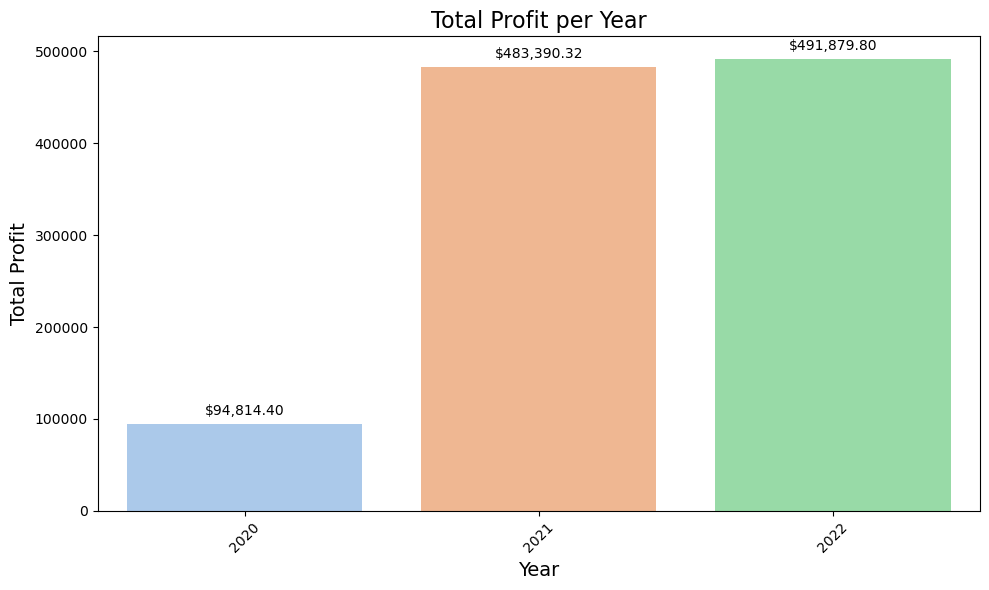

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Now calculate the 'profit' by subtracting 'total cost' from 'total sales'
df['profit'] = df['total sales'] - df['total cost']

# Group by 'Year' and calculate the total sum of 'profit' for each year, then reset the index
profit_per_year = df.groupby('Year_Correct')['profit'].sum().reset_index()

# Print the result
print(profit_per_year)

# Generate a color palette based on the number of unique years
num_years = profit_per_year['Year_Correct'].nunique()
color_palette = sns.color_palette("pastel", num_years)

# Plot a bar plot to visualize the total profit per year
plt.figure(figsize=(10, 6))

# Assign 'Year_Correct' to hue and use the custom color palette
bar_plot = sns.barplot(x='Year_Correct', y='profit', data=profit_per_year, hue='Year_Correct', 
                       palette=color_palette, dodge=False, legend=False)

# Add labels on top of each bar with comma formatting
for p in bar_plot.patches:
    bar_plot.annotate(f"${p.get_height():,.2f}",    # Format profit value with comma and 2 decimals
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Set the label position
                      ha='center', va='center',    # Align text horizontally and vertically centered
                      xytext=(0, 9),               # Distance of the text from the bar
                      textcoords='offset points')   # Positioning method

# Add titles and labels
plt.title('Total Profit per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### 1.2.3 Calculate total profit based one each state/location 

                   suplier location     profit
0                               NSW  130720.84
1                Northern Territory  105652.39
2                        Queensland  217075.40
3                   South Australia  135775.70
4                          Tasmania  176907.84
5  The Australian Capital Territory  128669.39
6                               VIC    1501.55
7                 Western Australia  173781.41


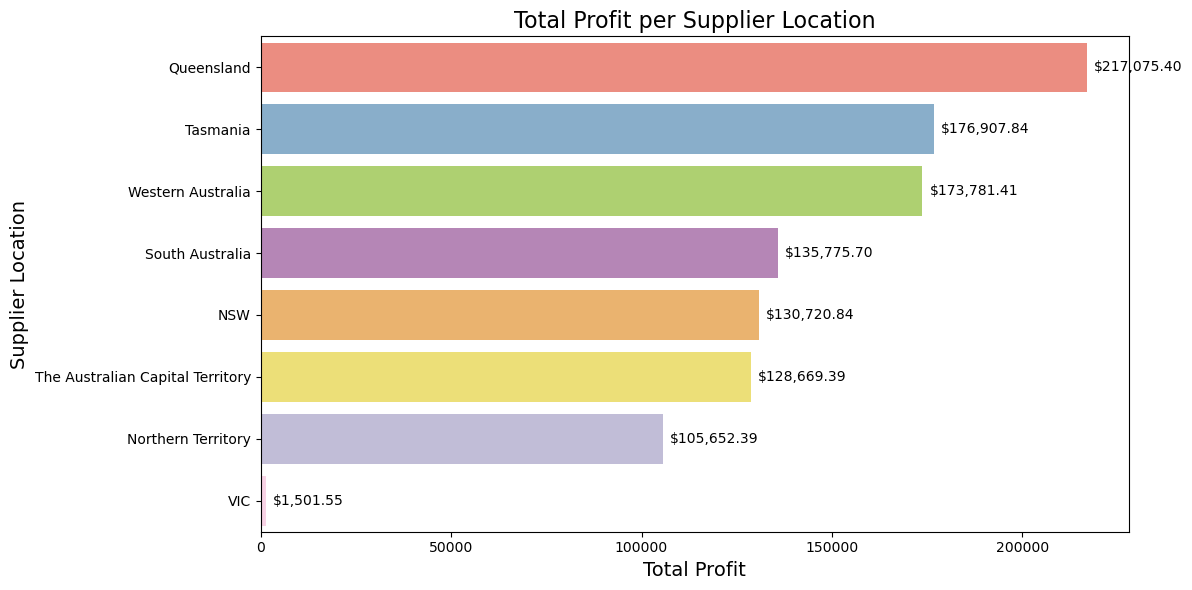

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'suplier location' and calculate the total sum of 'profit' for each location
profit_per_loc = df.groupby('suplier location')['profit'].sum().reset_index()

# Display the result in a table format (Jupyter will handle this automatically)
print(profit_per_loc)

# Sort the data by 'profit' from highest to lowest
profit_per_loc = profit_per_loc.sort_values(by='profit', ascending=False)

# Define the custom color palette
color_palette = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

# Plot a horizontal bar plot to visualize the total profit per supplier location
plt.figure(figsize=(12, 6))

# Create the horizontal bar plot with the custom color palette
ax = sns.barplot(x='profit', y='suplier location', data=profit_per_loc, 
                 hue='suplier location', palette=color_palette[:len(profit_per_loc)], legend=False)

# Add labels on the bars with comma formatting
for p in ax.patches:
    ax.annotate(f"${p.get_width():,.2f}",   # Format the profit value with comma and 2 decimals
                (p.get_width(), p.get_y() + p.get_height() / 2),  # Set the label position at the end of the bar
                ha='left', va='center',     # Align text to the left of the bar and center vertically
                xytext=(5, 0),              # Offset the text slightly to the right of the bar
                textcoords='offset points')  # Positioning method

# Add titles and labels
plt.title('Total Profit per Supplier Location', fontsize=16)
plt.xlabel('Total Profit', fontsize=14)
plt.ylabel('Supplier Location', fontsize=14)

# Ensure the layout fits well
plt.tight_layout()

# Show the plot
plt.show()


### 1.2.4 Identify monthly sales based on state  

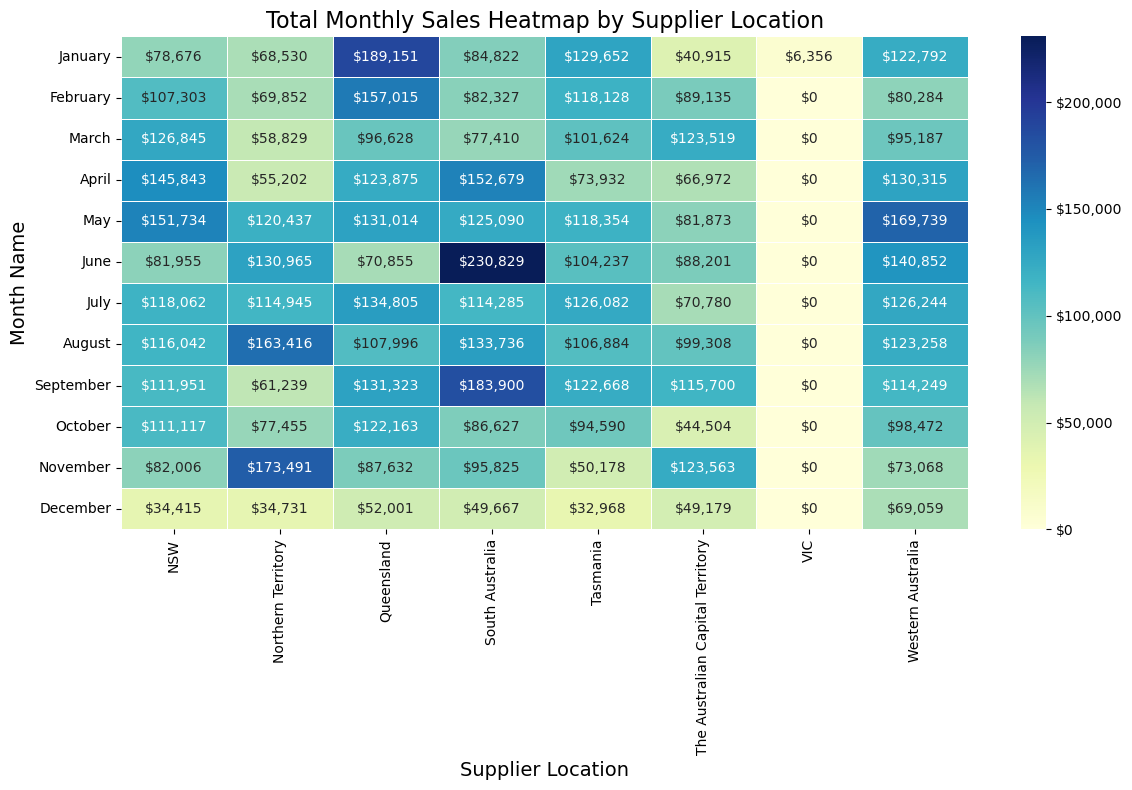

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Create a mapping to order the months from January to December
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group by 'suplier location' and 'MonthName_Correct' and sum the 'total sales' to avoid duplicates
grouped_data = df.groupby(['suplier location', 'MonthName_Correct'])['total sales'].sum().reset_index()

# Convert 'MonthName_Correct' to categorical with the correct order of months
grouped_data['MonthName_Correct'] = pd.Categorical(grouped_data['MonthName_Correct'], categories=month_order, ordered=True)

# Pivot the data so that each 'suplier location' is a column and each 'MonthName_Correct' is a row
pivot_table = grouped_data.pivot_table(index='MonthName_Correct', columns='suplier location', values='total sales', aggfunc='sum', observed=False)

# Fill missing values with 0
pivot_table = pivot_table.fillna(0)

# Sort the table by month order
pivot_table = pivot_table.reindex(month_order)

# Plot the heatmap using seaborn
plt.figure(figsize=(12, 8))

# Create a custom annotator function for currency formatting with commas
def currency_fmt(x, _):
    return f"${x:,.0f}"

# Create the heatmap
heatmap = sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5, cbar_kws={'format': mtick.FuncFormatter(currency_fmt)})

# Annotate with custom formatting (currency with commas)
for text in heatmap.texts:
    text.set_text(f"${float(text.get_text()):,.0f}")

# Add titles and labels
plt.title('Total Monthly Sales Heatmap by Supplier Location', fontsize=16)
plt.ylabel('Month Name', fontsize=14)
plt.xlabel('Supplier Location', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


## 1.3 identify and visualise items sold in the year 2021. Discuss what you have learned from the data outcome (200words) 

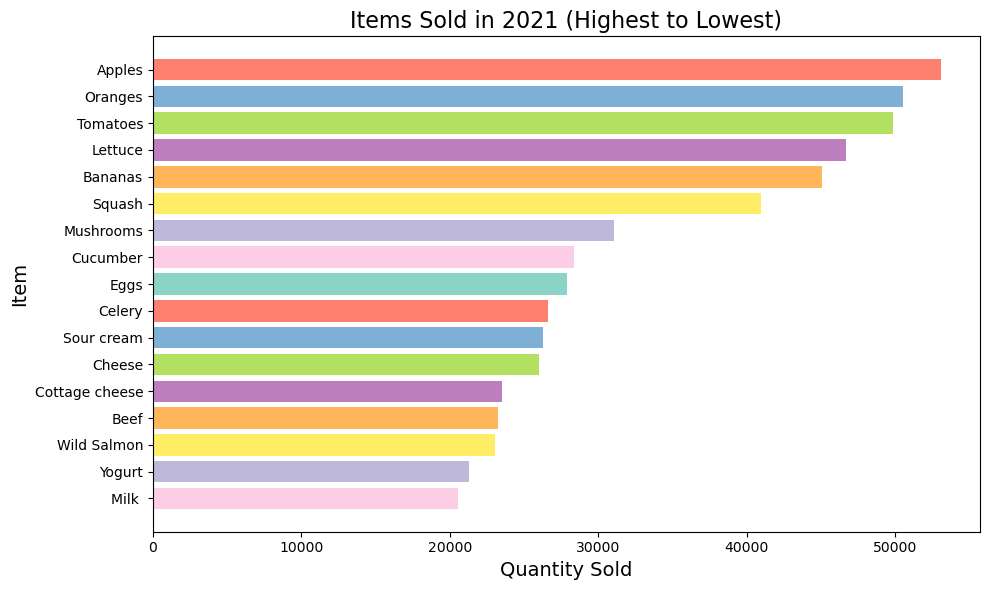

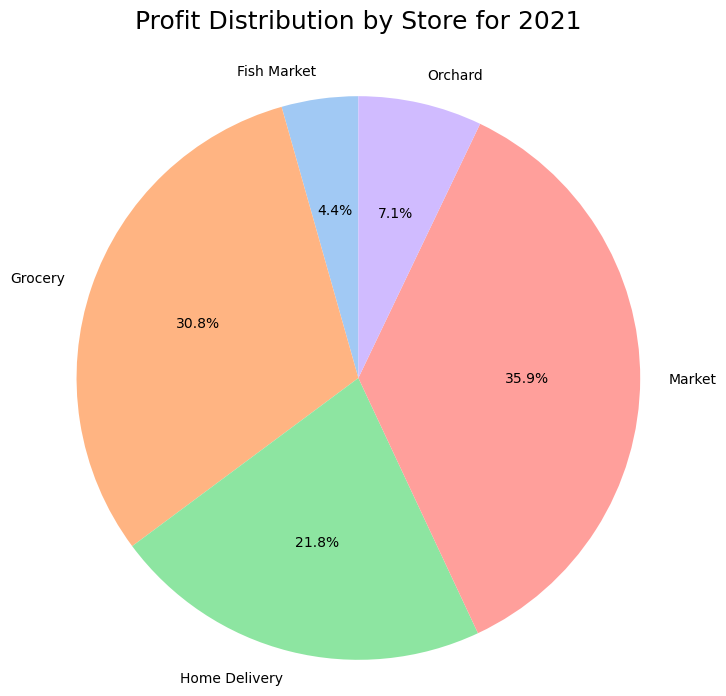

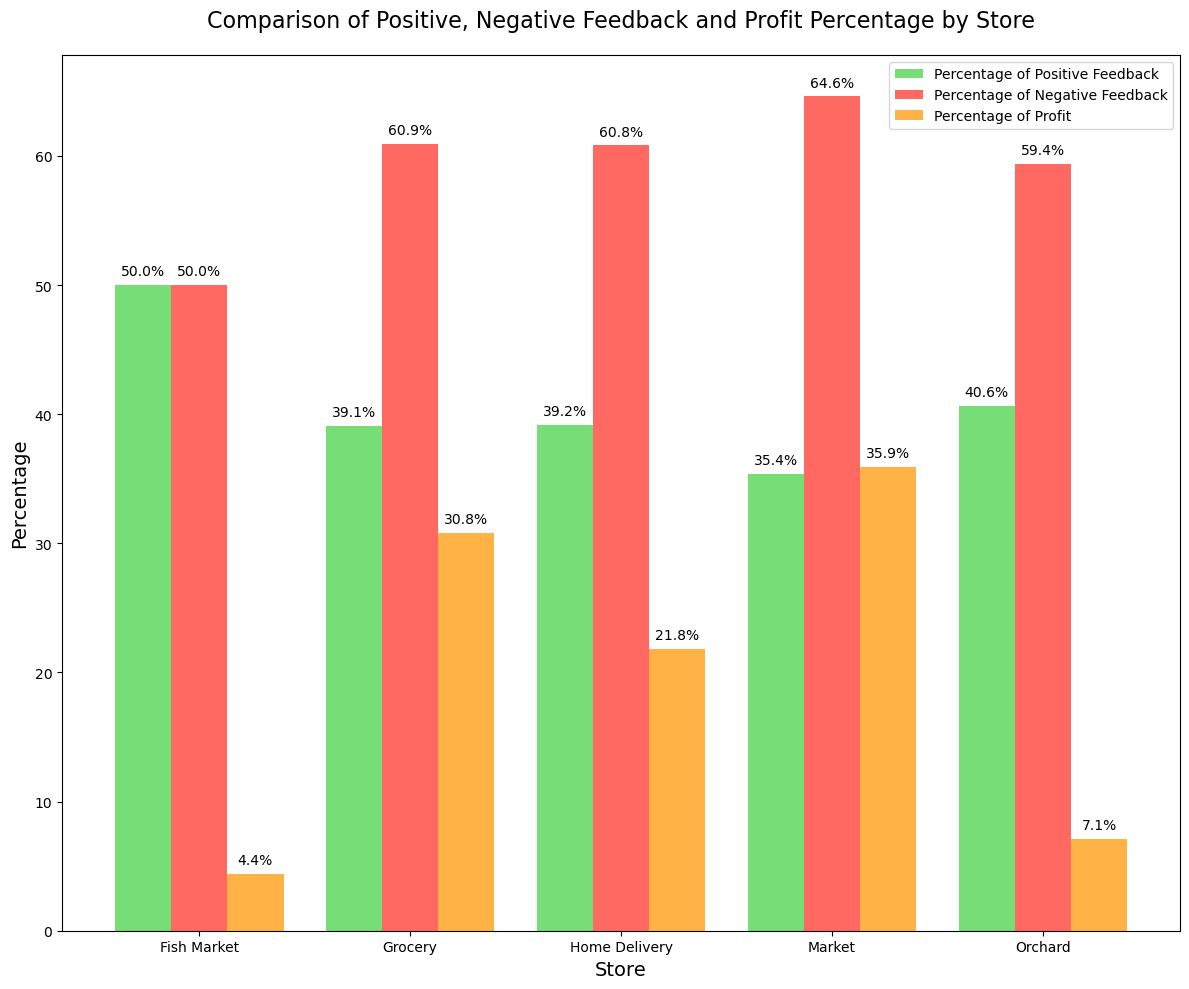

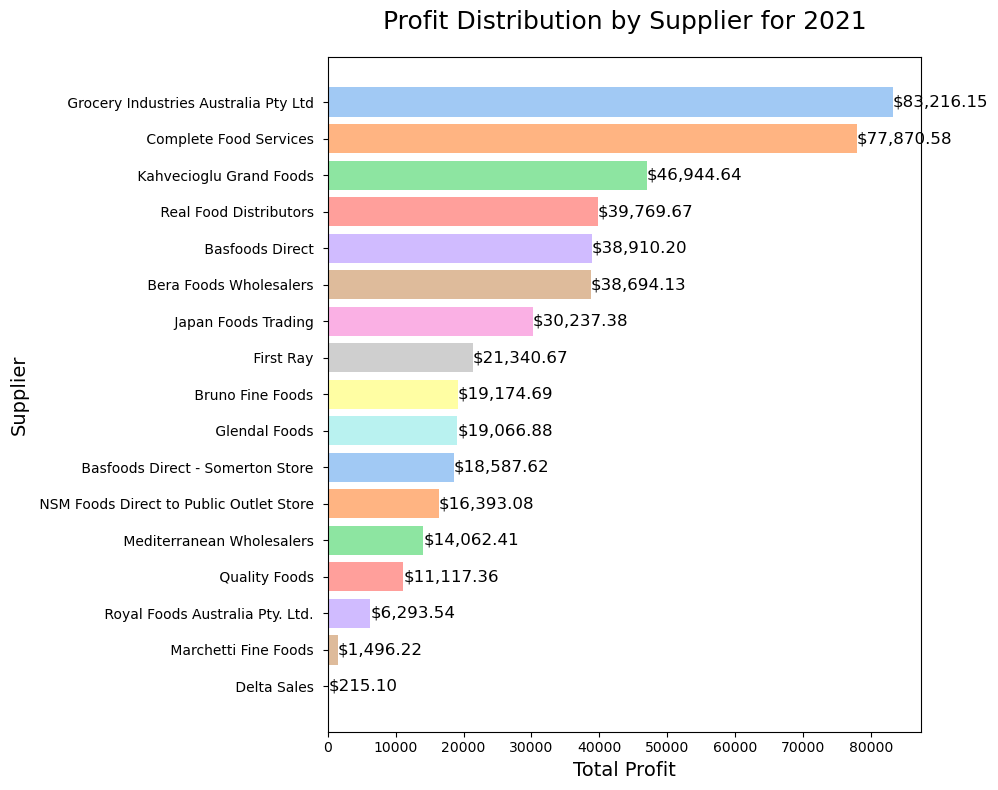

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the year 2021
df_2021 = df[df['Year_Correct'] == 2021]

# Group by 'Item' and sum the 'quantity' sold in 2021
items_sold_2021 = df_2021.groupby('Item')['quantity'].sum().reset_index()

# Sort the items by quantity from highest to lowest
items_sold_2021 = items_sold_2021.sort_values(by='quantity', ascending=False)

# Define the color palette
color_palette = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

# Visualize the items sold in 2021 using a horizontal bar chart with the given color palette
plt.figure(figsize=(10,6))
plt.barh(items_sold_2021['Item'], items_sold_2021['quantity'], color=color_palette[:len(items_sold_2021)])
plt.title('Items Sold in 2021 (Highest to Lowest)', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=14)
plt.ylabel('Item', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have highest values on top
plt.tight_layout()
plt.show()

print()
print()

# Group by 'Store' and sum the 'profit' for each store
store_profit_distribution = df_2021.groupby('Store')['profit'].sum()

# Plot a pie chart for profit distribution per store
plt.figure(figsize=(8, 8))
plt.pie(store_profit_distribution, labels=store_profit_distribution.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('pastel'))

# Add a title with larger font size and additional padding
plt.title('Profit Distribution by Store for 2021', fontsize=18, pad=30)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


print()
print()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_2021 contains 'Store', 'profit', and 'Feedback' columns

# Step 1: Filter for "Positive" and "Negative" feedback and calculate their percentages per store
positive_feedback_distribution = df_2021[df_2021['Feedback'] == 'Positive'].groupby('Store')['Feedback'].count()
negative_feedback_distribution = df_2021[df_2021['Feedback'] == 'Negative'].groupby('Store')['Feedback'].count()
total_feedback_per_store = df_2021.groupby('Store')['Feedback'].count()

positive_percentage = (positive_feedback_distribution / total_feedback_per_store) * 100
negative_percentage = (negative_feedback_distribution / total_feedback_per_store) * 100

# Step 2: Calculate the percentage of profit per store
store_profit_distribution = df_2021.groupby('Store')['profit'].sum()
total_profit = store_profit_distribution.sum()
profit_percentage = (store_profit_distribution / total_profit) * 100

# Step 3: Combine the three metrics into a DataFrame for easier plotting
comparison_df = pd.DataFrame({
    'Percentage of Positive Feedback': positive_percentage,
    'Percentage of Negative Feedback': negative_percentage,
    'Percentage of Profit': profit_percentage
}).reset_index()

# Step 4: Plotting the side-by-side bar plot to compare Positive %, Negative %, and Profit %
fig, ax = plt.subplots(figsize=(12, 10))

# Use pastel green for positive, pastel red for negative, and pastel orange for profit
colors = ['#77dd77', '#ff6961', '#ffb347']  # Pastel green, red, and orange

comparison_df.set_index('Store')[['Percentage of Positive Feedback', 'Percentage of Negative Feedback', 'Percentage of Profit']].plot(kind='bar', width=0.8, ax=ax, color=colors)

# Add titles and labels
plt.title('Comparison of Positive, Negative Feedback and Profit Percentage by Store', fontsize=16, pad=20)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Change x-axis label direction to horizontal
plt.xticks(rotation=0)

# Adding percentage labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


print()
print()

# Group by 'suplier' and sum the 'profit' for each supplier, then sort in descending order
store_profit_distribution = df_2021.groupby('suplier')['profit'].sum().sort_values(ascending=False)

# Plot a horizontal bar chart for profit distribution per supplier
plt.figure(figsize=(10, 8))
bars = plt.barh(store_profit_distribution.index, store_profit_distribution, color=sns.color_palette('pastel'))

# Add a title with larger font size and padding
plt.title('Profit Distribution by Supplier for 2021', fontsize=18, pad=20)

# Label the axes
plt.xlabel('Total Profit', fontsize=14)
plt.ylabel('Supplier', fontsize=14)

# Reverse the order of y-axis to display the highest bar on top
plt.gca().invert_yaxis()

# Add labels with currency and comma formatting on the bars
for bar in bars:
    width = bar.get_width()  # Get the width (value) of each bar
    plt.text(
        width,                # X-coordinate of the text (profit value)
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate of the text (center of the bar)
        f'${width:,.2f}',     # Format the number with commas and two decimal points
        va='center',          # Vertical alignment of the text
        ha='left',            # Horizontal alignment of the text (slightly offset to the right)
        fontsize=12           # Font size of the text
    )

# Ensure the layout is tight and labels fit well
plt.tight_layout()

# Show the plot
plt.show()

## Interpretation: The chart is useful for identifying the most popular items, like Apples, and the least popular items, like Milk. The store is most profitable for items sold in the Market and the ROI is the best in supplier, Grocery Industries Australia. 
## In terms of product feedback, items sold in store type, Orchard has the 2nd lowest profit % and one of the highest negative product feedback. There is an opportunity to investigate this further on what's causing the customer dissatisfaction to to increase profit. 

# Section2(A Jupyter Notebook in session 5 to the designated Dropbox as a lab submission):

### 2.1Consider the “AusiFood Foodsupplier.xlsx” particulate feedback column and identify state which has more positive feedback. Discuss result (200words) 

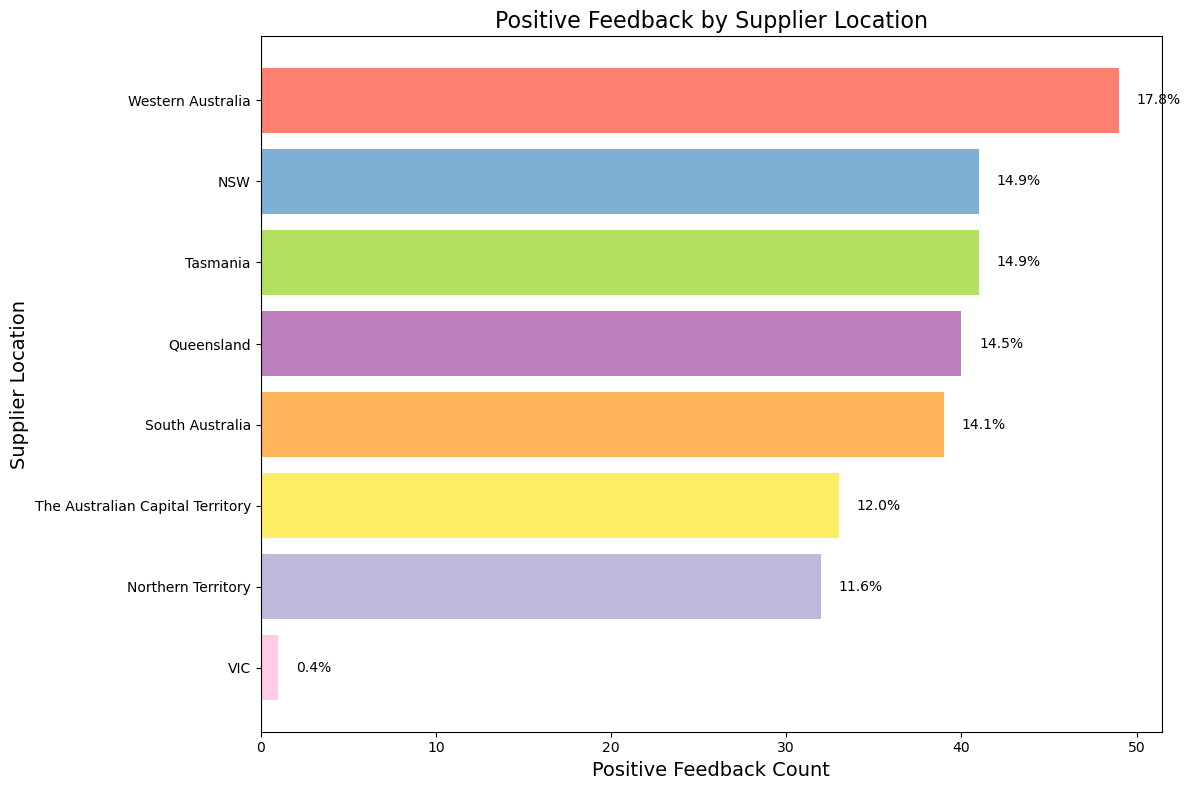

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'suplier location' and 'product feedback' columns exist in your DataFrame

# Define positive feedback categories
positive_feedback_values = ['Positive']

# Filter rows where product feedback is positive
positive_feedback = df[df['Feedback'].isin(positive_feedback_values)]

# Group by 'suplier location' and count the number of positive feedbacks
feedback_by_location = positive_feedback.groupby('suplier location').size().reset_index(name='positive_feedback_count')

# Calculate total positive feedback to compute percentages
total_feedback = feedback_by_location['positive_feedback_count'].sum()

# Calculate the percentage of positive feedback for each supplier location
feedback_by_location['positive_feedback_percentage'] = (feedback_by_location['positive_feedback_count'] / total_feedback) * 100

# Sort the suplier locations by positive feedback count, descending
feedback_by_location = feedback_by_location.sort_values(by='positive_feedback_count', ascending=False)

# Define the color palette
color_palette = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(feedback_by_location['suplier location'], feedback_by_location['positive_feedback_count'], color=color_palette[:len(feedback_by_location)])
plt.title('Positive Feedback by Supplier Location', fontsize=16)
plt.xlabel('Positive Feedback Count', fontsize=14)
plt.ylabel('Supplier Location', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest ranked supplier location at the top

# Add percentage labels to each bar
for i, bar in enumerate(bars):
    width = bar.get_width()  # The width of the bar corresponds to the count of positive feedback
    percentage = feedback_by_location['positive_feedback_percentage'].iloc[i]  # Get the percentage
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%', va='center', fontsize=10)

plt.tight_layout()

# Show the plot
plt.show()


## Interpretation: I grouped the product feedback into two categories, Positive and Negative and identified that Western Australia has the most positive feedback followed by NSW while Northern Territory and VIC have the least positive experience from customers. 

### 2.2Does product price varies city to city? Identify data, analyse, visualise and discuss result (200words)  

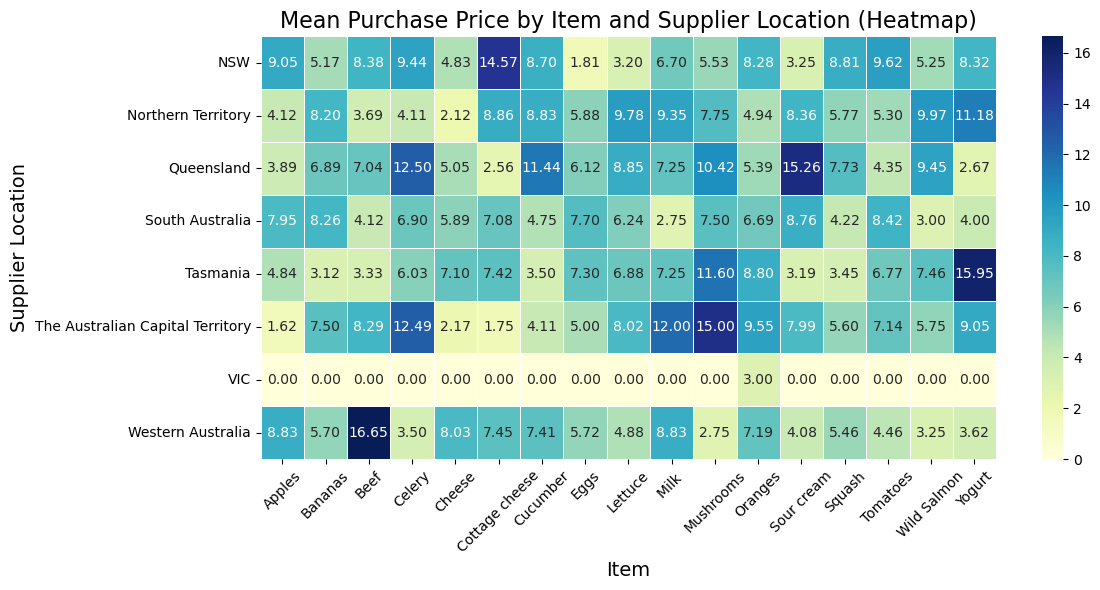

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Item', 'purchase price', and 'suplier location' columns exist in your DataFrame

# Step 1: Group by 'Item' and 'suplier location' to get the mean purchase price
mean_price_by_location = df.groupby(['Item', 'suplier location'])['purchase price'].mean().reset_index()

# Step 2: Pivot the data to have 'Item' as columns and 'suplier location' as rows, with 'purchase price' as values
pivot_table = mean_price_by_location.pivot(index='suplier location', columns='Item', values='purchase price').fillna(0)

# Step 3: Plotting the heatmap
plt.figure(figsize=(12, 6))

# Create the heatmap using seaborn
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

# Add titles and labels
plt.title('Mean Purchase Price by Item and Supplier Location (Heatmap)', fontsize=16)
plt.xlabel('Item', fontsize=14)
plt.ylabel('Supplier Location', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## Computed the mean purchase price per item and the amounts differ per city. Particular items like Sour Cream have wide disparity of purchase price per supplier city, which is 15.26 in Queensland and 3.19 and Tasmania - that's almost 4 times the purchase price difference.  

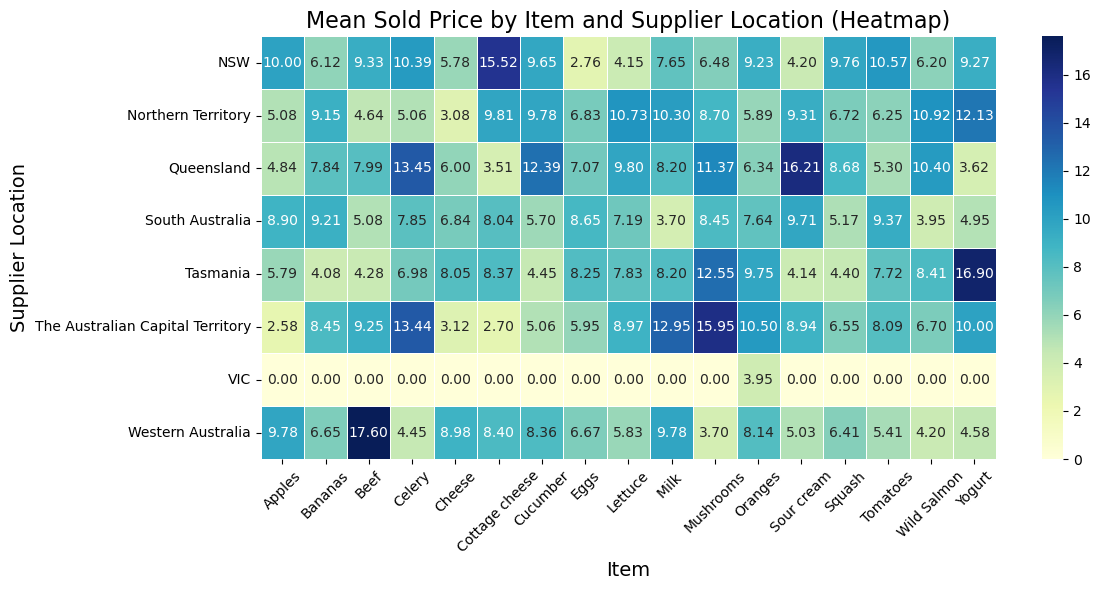

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Item', 'purchase price', and 'suplier location' columns exist in your DataFrame

# Step 1: Group by 'Item' and 'suplier location' to get the mean purchase price
mean_price_by_location = df.groupby(['Item', 'suplier location'])['sold price'].mean().reset_index()

# Step 2: Pivot the data to have 'Item' as columns and 'suplier location' as rows, with 'purchase price' as values
pivot_table = mean_price_by_location.pivot(index='suplier location', columns='Item', values='sold price').fillna(0)

# Step 3: Plotting the heatmap
plt.figure(figsize=(12, 6))

# Create the heatmap using seaborn
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

# Add titles and labels
plt.title('Mean Sold Price by Item and Supplier Location (Heatmap)', fontsize=16)
plt.xlabel('Item', fontsize=14)
plt.ylabel('Supplier Location', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## Similarly in purchase price, it differs per city. For example, Beef in Western Australia is priced at 17.60 while in Tasmania it's for sale at 4.08.

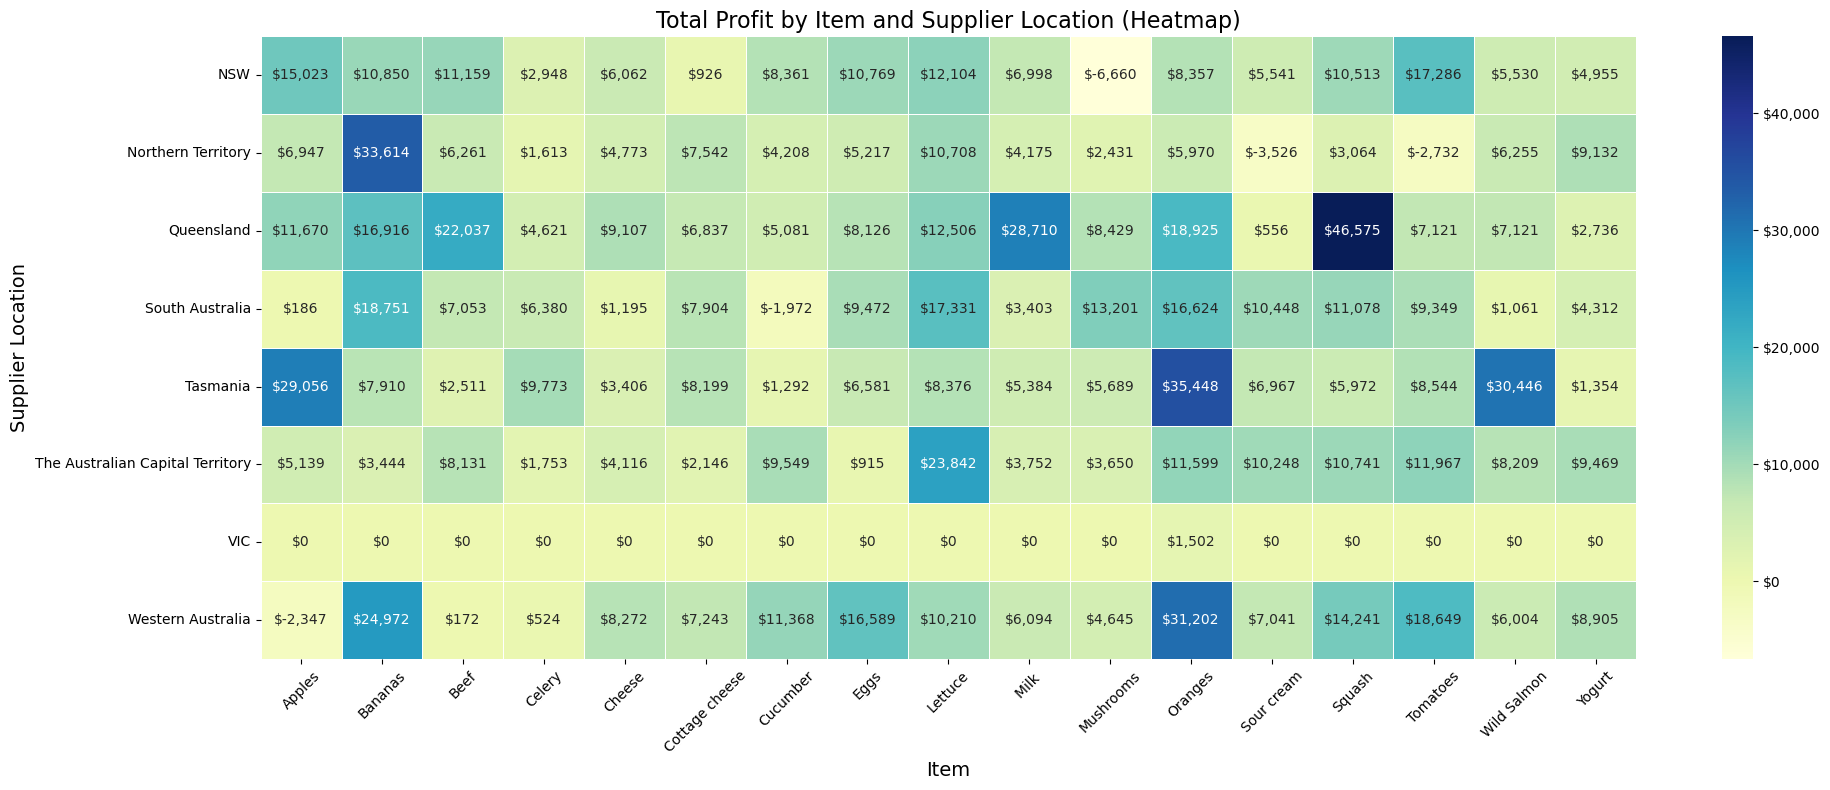

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Assuming 'Item', 'profit', and 'suplier location' columns exist in your DataFrame

# Step 1: Group by 'Item' and 'suplier location' to get the sum of profit
sum_profit_by_location = df.groupby(['Item', 'suplier location'])['profit'].sum().reset_index()

# Step 2: Pivot the data to have 'Item' as columns and 'suplier location' as rows, with 'profit' as values
pivot_table = sum_profit_by_location.pivot(index='suplier location', columns='Item', values='profit').fillna(0)

# Step 3: Plotting the heatmap
plt.figure(figsize=(20, 8))

# Define a custom formatter for currency with commas
def currency_fmt(x, pos):
    return f'${x:,.0f}'

# Create the heatmap using seaborn with currency formatting
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, 
            cbar_kws={'format': mtick.FuncFormatter(currency_fmt)})

# Add titles and labels
plt.title('Total Profit by Item and Supplier Location (Heatmap)', fontsize=16)
plt.xlabel('Item', fontsize=14)
plt.ylabel('Supplier Location', fontsize=14)
plt.xticks(rotation=45)

# Manually format the annotation text as currency
for text in plt.gca().texts:
    text.set_text(f'${int(text.get_text()):,}')

plt.tight_layout()

# Show the plot
plt.show()


## Since both the purchase and sold price differ per city, the profit also differs. As shown in above heatmap, the business is the most profitable in selling Squash which are sourced from Queensland.
## They are negative of $6,660 by selling Mushrooms sourced from NSW, so I would recommend for the business to check other supplier location for this. 

# Section3

## 3.1 Does variable "Item" vary between different types of Stores (i.e. variable "Store")? Identify data, analyse, visualise and discuss results 

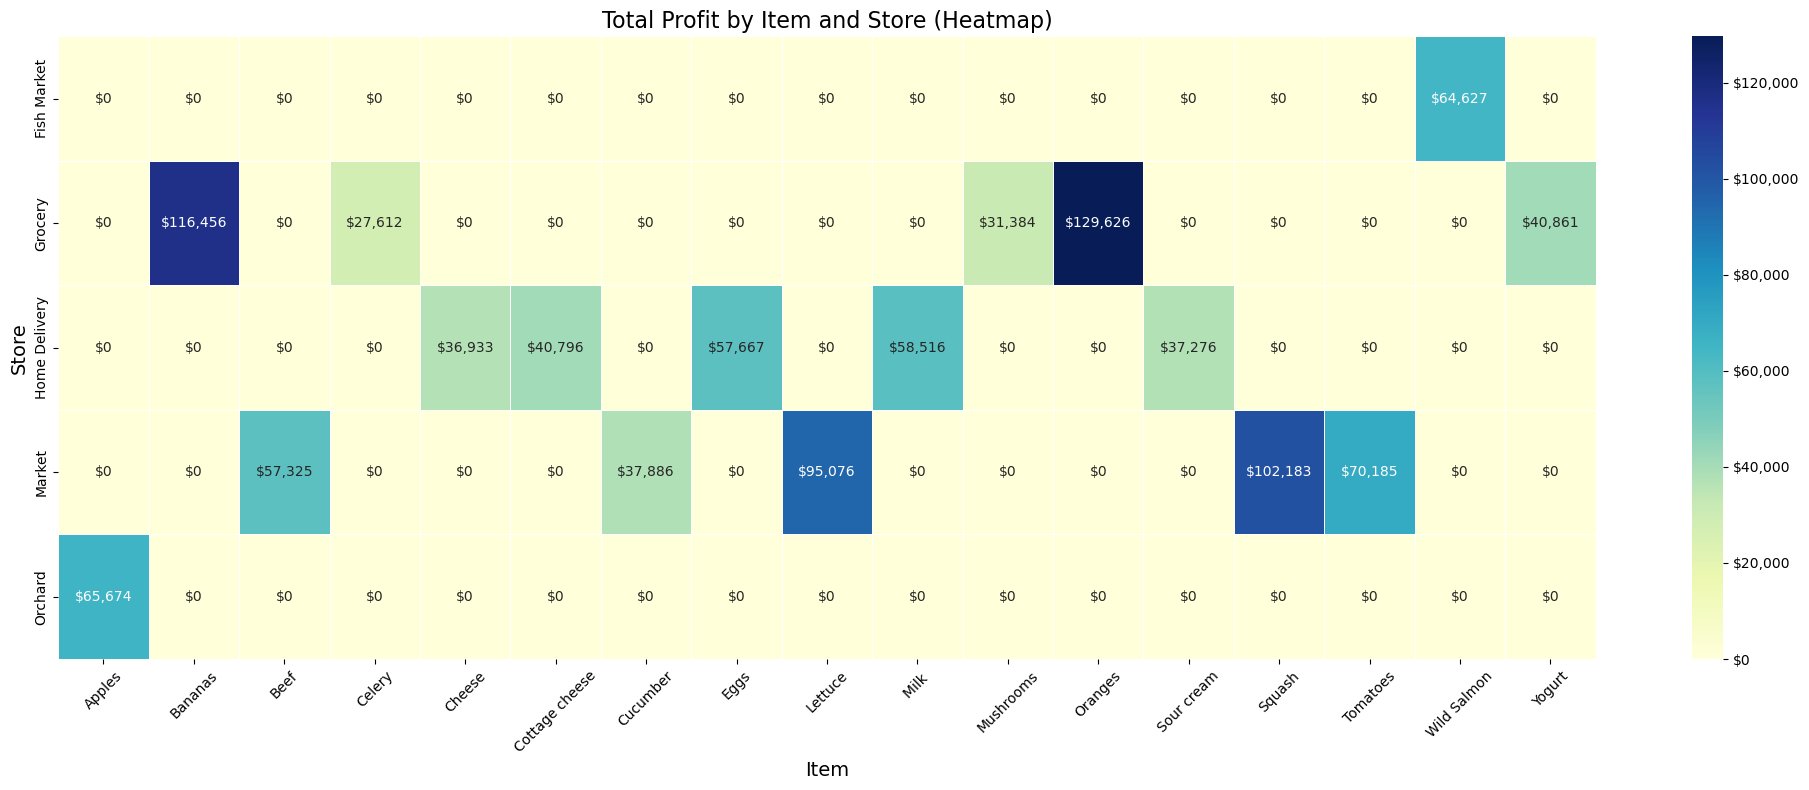

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Assuming 'Item', 'profit', and 'suplier location' columns exist in your DataFrame

# Step 1: Group by 'Item' and 'suplier location' to get the sum of profit
sum_profit_by_location = df.groupby(['Item', 'Store'])['profit'].sum().reset_index()

# Step 2: Pivot the data to have 'Item' as columns and 'suplier location' as rows, with 'profit' as values
pivot_table = sum_profit_by_location.pivot(index='Store', columns='Item', values='profit').fillna(0)

# Step 3: Plotting the heatmap
plt.figure(figsize=(20, 8))

# Define a custom formatter for currency with commas
def currency_fmt(x, pos):
    return f'${x:,.0f}'

# Create the heatmap using seaborn with currency formatting
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, 
            cbar_kws={'format': mtick.FuncFormatter(currency_fmt)})

# Add titles and labels
plt.title('Total Profit by Item and Store (Heatmap)', fontsize=16)
plt.xlabel('Item', fontsize=14)
plt.ylabel('Store', fontsize=14)
plt.xticks(rotation=45)

# Manually format the annotation text as currency
for text in plt.gca().texts:
    text.set_text(f'${int(text.get_text()):,}')

plt.tight_layout()

# Show the plot
plt.show()


## The business is most profitable for selling Oranges in the Grocery and they are least profitable in selling Celery in the Grocery. 

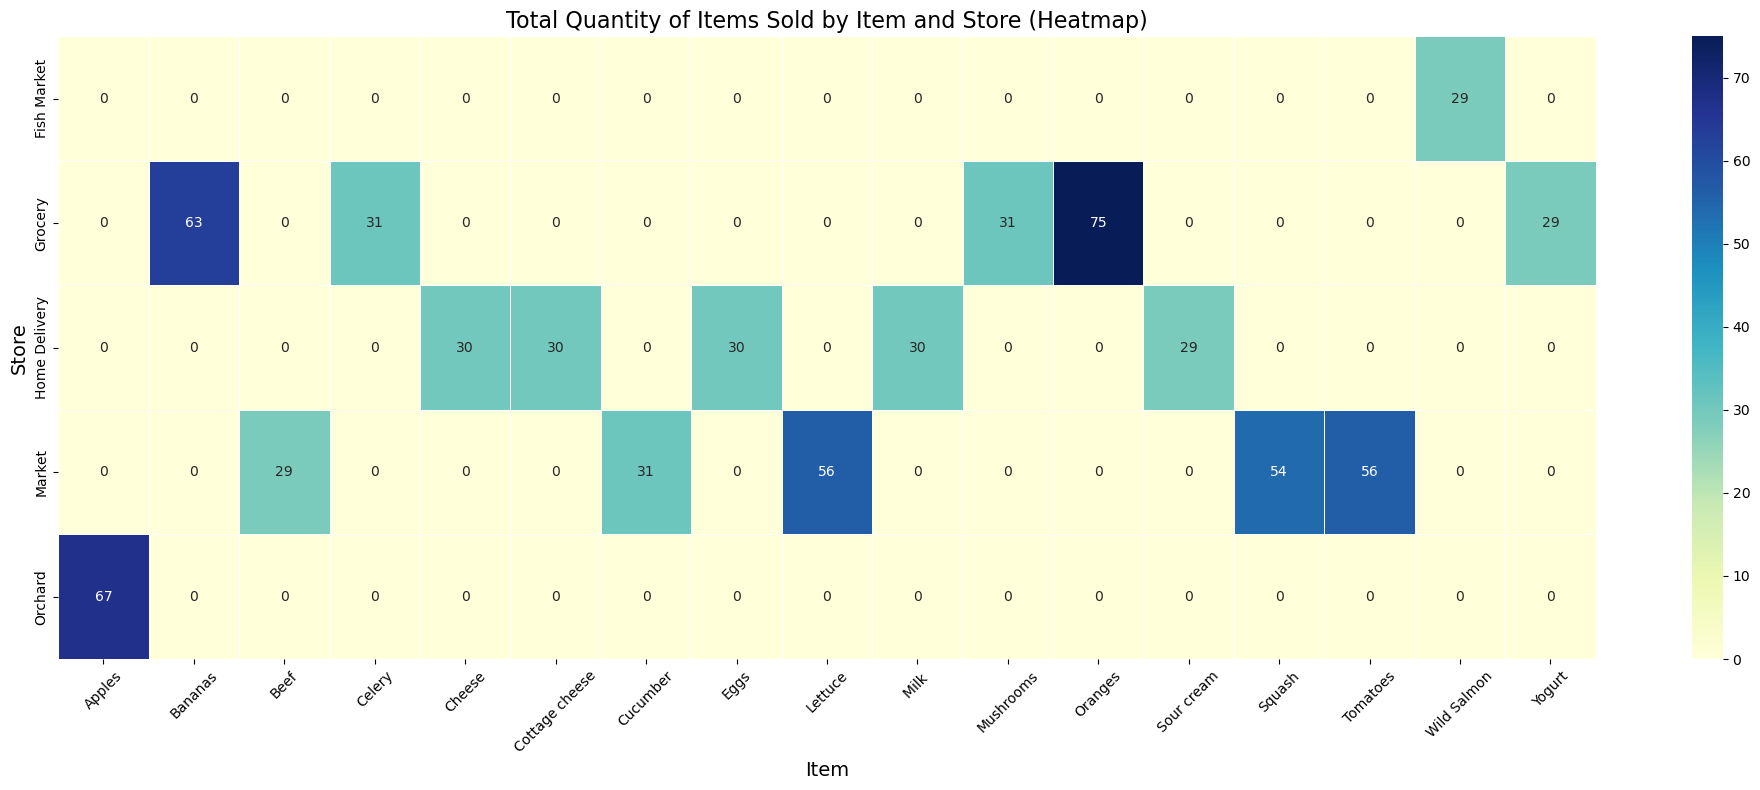

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Item', 'Item_id', and 'Store' columns exist in your DataFrame

# Step 1: Group by 'Item' and 'Store' to count the number of 'Item_id' (quantity of items sold)
total_quantity_by_location = df.groupby(['Item', 'Store'])['Item_id'].count().reset_index()

# Step 2: Pivot the data to have 'Item' as columns and 'Store' as rows, with 'Item_id' counts as values
pivot_table = total_quantity_by_location.pivot(index='Store', columns='Item', values='Item_id').fillna(0)

# Step 3: Plotting the heatmap
plt.figure(figsize=(20, 8))

# Create the heatmap using seaborn
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

# Add titles and labels
plt.title('Total Quantity of Items Sold by Item and Store (Heatmap)', fontsize=16)
plt.xlabel('Item', fontsize=14)
plt.ylabel('Store', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Show the plot
plt.show()


## In terms of volume sales, the total quantity sold are the highest in Oranges and Bananas sold in the Grocery and Apples sold in the Orchard. 

## 3.2 Identify item ids where the supplier is in Tasmania supply to Market ("Store type")? Identify data, analyse, visualise and discuss result 

In [53]:
import pandas as pd

# Assuming df contains columns 'item id', 'supplier location', and 'Store'

# Step 1: Filter the DataFrame where 'supplier location' is 'Tasmania' and 'Store' is 'Market'
filtered_df = df[(df['suplier location'] == 'Tasmania') & (df['Store'] == 'Market')]

# Step 2: Extract the 'item ids' from the filtered DataFrame
item_ids_in_tasmania = filtered_df['Item_id'].unique()

# Display the unique 'item ids'
print('Item IDs supplied by Tasmania to store type, Market:', item_ids_in_tasmania)

Item IDs supplied by Tasmania to store type, Market: [1125. 1150. 1184. 1196. 1254. 1274. 1281. 1286. 1346. 1353. 1392. 1397.
 1422. 1449. 1462. 1472. 1487. 1494. 1512. 1546. 1563. 1579. 1586. 1604.
 1655. 1765. 1797.]


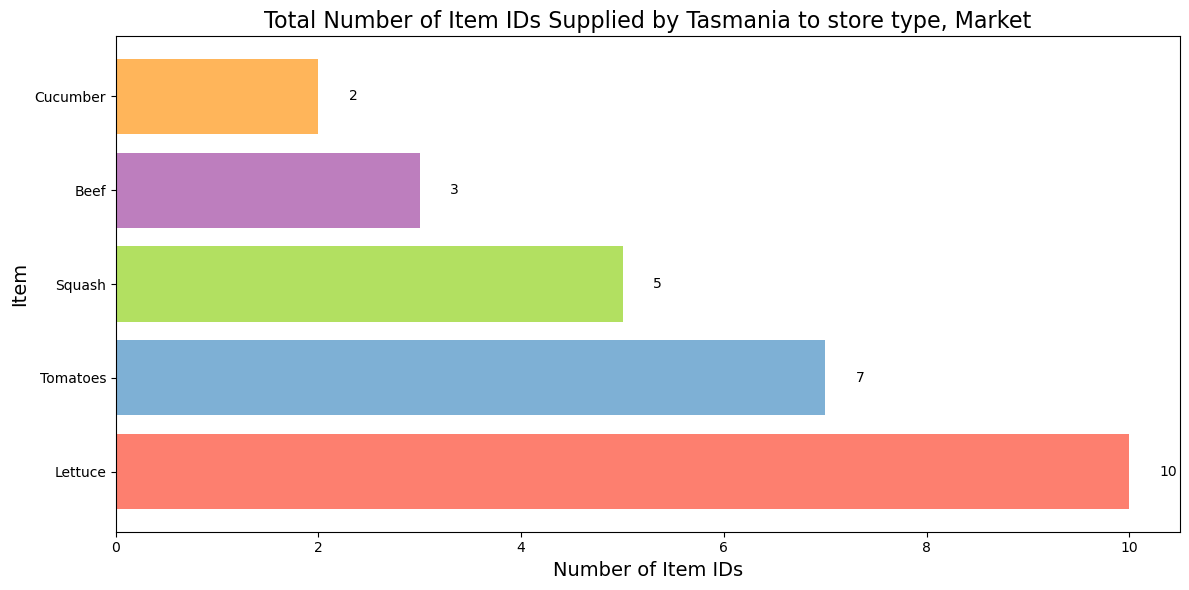

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains columns 'item id', 'Item', 'suplier location', and 'Store'

# Step 1: Filter the DataFrame where 'suplier location' is 'Tasmania' and 'Store' is 'Market'
filtered_df = df[(df['suplier location'] == 'Tasmania') & (df['Store'] == 'Market')]

# Step 2: Group by 'Item' to count how many 'item ids' each item has
item_count = filtered_df.groupby('Item')['Item_id'].nunique().reset_index(name='item_count')

# Step 3: Sort the DataFrame by 'item_count' in descending order
item_count = item_count.sort_values(by='item_count', ascending=False)

# Define the custom color palette
color_palette = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

# Step 4: Plot the horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(item_count['Item'], item_count['item_count'], color=color_palette[:len(item_count)])

# Add titles and labels
plt.title('Total Number of Item IDs Supplied by Tasmania to store type, Market', fontsize=16)
plt.xlabel('Number of Item IDs', fontsize=14)
plt.ylabel('Item', fontsize=14)

# Add labels on the bars
for bar in bars:
    width = bar.get_width()  # Get the width of the bar (value)
    plt.text(width + 0.3, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', fontsize=10)

# Tighten layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


## In terms of total quantity sold where the supplier is from Tasmania and sold in the Market, Lettuce has the highest number while Cucumber has the least quantity sold.

## 3.3 Identify items’ product sold prices between 5.00 and 12.00 and visualise result.
## Discuss what you have learned from the data outcome.

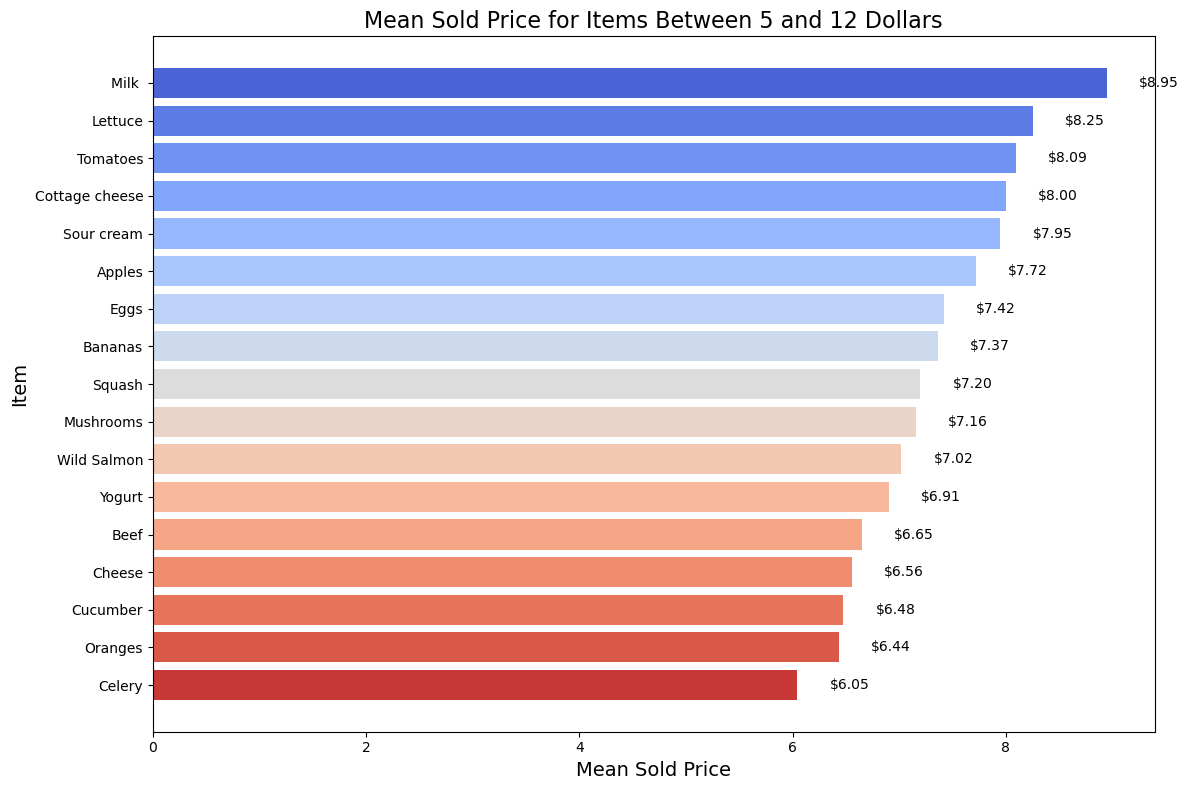

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains columns 'sold price' and 'Item'

# Step 1: Filter items where 'sold price' is between 5.00 and 12.00
filtered_items = df[(df['sold price'] >= 5.00) & (df['sold price'] <= 12.00)]

# Step 2: Group by 'Item' and calculate the mean sold price for each item
mean_price_by_item = filtered_items.groupby('Item')['sold price'].mean().reset_index()

# Step 3: Sort the DataFrame by 'sold price' in descending order
mean_price_by_item = mean_price_by_item.sort_values(by='sold price', ascending=False)

# Step 4: Plot the horizontal bar chart, ensuring sorted order from highest to lowest
plt.figure(figsize=(12, 8))
bars = plt.barh(mean_price_by_item['Item'], mean_price_by_item['sold price'], color=sns.color_palette("coolwarm", len(mean_price_by_item)))

# Add titles and labels
plt.title('Mean Sold Price for Items Between 5 and 12 Dollars', fontsize=16)
plt.xlabel('Mean Sold Price', fontsize=14)
plt.ylabel('Item', fontsize=14)

# Invert the y-axis so the highest value appears at the top
plt.gca().invert_yaxis()

# Add labels on the bars with currency formatting
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.3, bar.get_y() + bar.get_height()/2, f'${width:,.2f}', va='center', fontsize=10)

# Tighten layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


## I filtered items that have 5 to 12 dollars selling price, and computed the mean for each item. As shown in above bar chart, Milk has the highest sold price amount while celery has the least amount.